In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Defining MCP network

In [58]:
# MacCulloch-Pitts neuron class
class MCP:

    def __init__(self,weights,threshold):
        self.weights = weights
        self.threshold = threshold

    def forward(self,x):
        # dot product of input and weights
        logits = np.dot(self.weights,x)
        # Check if the given point is in the right position or not
        if logits >= self.threshold:
            output = 1
        else:
            output = 0
        return output

# Main Network
def mcp_net(X, boolian=False):

    # Creating neurons
    neuron_1 = MCP([-2, -1], -6)
    neuron_2 = MCP([0, 1], 0)
    neuron_3 = MCP([2, -1], 2)
    neuron_4 = MCP([1, 1, 1], 3) # Output neuron

    # Forward mothod for all neurons
    logit_1 = neuron_1.forward(X)
    logit_2 = neuron_2.forward(X)
    logit_3 = neuron_3.forward(X)
    output = neuron_4.forward(np.array([logit_1,logit_2, logit_3]))
    if boolian:
        output = bool(output)

    return output


Using the network to predict

In [59]:
# Point in the area
inside_1 = np.array([2,1])
inside_2 = np.array([2,1.5])

# Points out of the area
outside_1 = np.array([0,0])
outside_2 = np.array([1,1])

points = [inside_1,inside_2, outside_1, outside_2]

# Loop to test performace of model
for p in points:

    pos = mcp_net(p, boolian=True)
    put_in_text = ' NOT' if not pos else ''
    print(f'Point with coordinates of {p} is{put_in_text} in the area')

Point with coordinates of [2 1] is in the area
Point with coordinates of [2.  1.5] is in the area
Point with coordinates of [0 0] is NOT in the area
Point with coordinates of [1 1] is NOT in the area


Creating random numbers

In [60]:
np.random.seed(69)
# Random coordinates
random_x = np.random.rand(2000)*4
random_y = np.random.rand(2000)*4 - 1

# Check if a coordinate is in the area or not
m_list = []
for i in range(len(random_x)):

    coor = np.array([random_x[i], random_y[i]])
    is_in = mcp_net(coor, boolian=False)
    m_list.append(is_in)


Creating limit lines

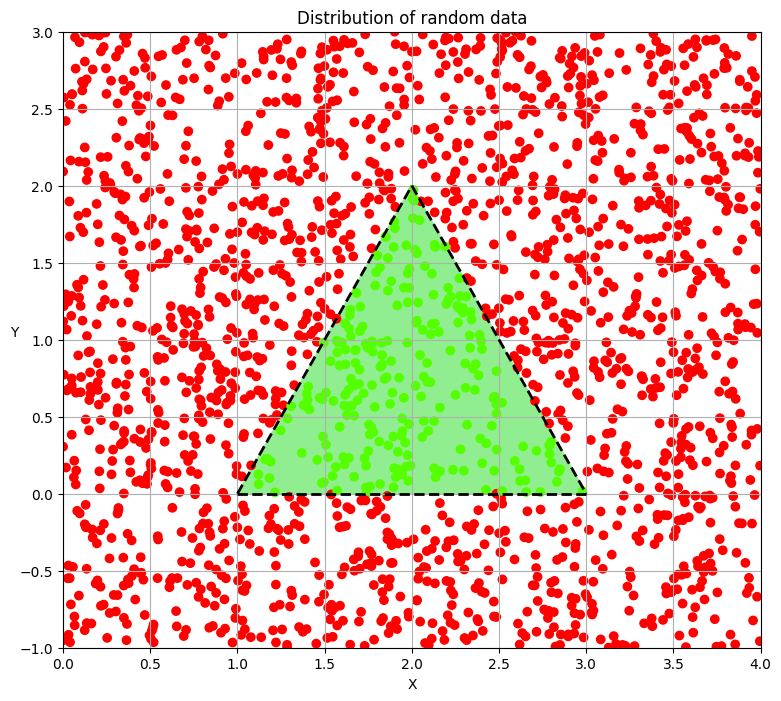

In [61]:
# Plotting the lines
tri_x = [1,2,3]
tri_y = [0,2,0]
plt.figure(figsize=(9,8))
plt.plot([tri_x[1], tri_x[2]],[tri_y[1], tri_y[2]], linestyle='--', color='black', linewidth=2, label = 'y + 2x -6 = 0')
plt.plot([tri_x[2], tri_x[0]],[tri_y[2], tri_y[0]], linestyle='--', color='black', linewidth=2, label = 'y = 0 ')
plt.plot([tri_x[0], tri_x[1]],[tri_y[0], tri_y[1]], linestyle='--', color='black', linewidth=2, label = 'y -2x + 2 = 0')
plt.fill(tri_x, tri_y, color='lightgreen')

# Plot outcome
plt.scatter(random_x, random_y, c=m_list, cmap='prism')

#
plt.ylim([-1,3])
plt.xlim([0,4])
plt.title('Distribution of random data')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.grid()
plt.show()


Normal Neurons

In [62]:
class Neuron:

    def __init__(self,weigths,bias):
        self.weights = weigths
        self.bias = bias

    def _logits(self,x):
        return np.dot(self.weights,x) + self.bias

    def _sigmoid(self,x):
        logit = self._logits(x)
        output = 1/(1+np.exp(-logit))
        return output

    def _tanh(self,x):
        logit = self._logits(x)
        output = np.tanh(logit)
        return output
    
    def forward(self,x,activation='s'):
        if activation=='s':
            output = self._sigmoid(x)
        elif activation=='t':
            output = self._tanh(x)
        return output

In [82]:
# Network wiht sigmoid activation
def sigmoid_net(x, C=1):
    
    # Define all neurons 
    n1_1 = Neuron(np.array([-2,-1])*C, 6*C)
    n1_2 = Neuron(np.array([0,1])*C, 0*C)
    n1_3 = Neuron(np.array([2,-1])*C, -2*C)
    n2_1 = Neuron(np.array([1,1,1])*C, -1.5*C)

    # Net forward
    logit1 = n1_1.forward(x)
    logit2 = n1_2.forward(x)
    logit3 = n1_3.forward(x)
    logit = n2_1.forward(np.array([logit1,logit2,logit3]))

    return logit


# Network with tanh activation
def tanh_net(x, C=1):
    
    # Define all neurons 
    n1_1 = Neuron(np.array([-2,-1])*C, 6*C)
    n1_2 = Neuron(np.array([0,1])*C, 0*C)
    n1_3 = Neuron(np.array([2,-1])*C, -2*C)
    n2_1 = Neuron(np.array([1,1,1])*C, 0)

    # Net forward
    logit1 = n1_1.forward(x, activation='t')
    logit2 = n1_2.forward(x, activation='t')
    logit3 = n1_3.forward(x, activation='t')
    logit = n2_1.forward(np.array([logit1,logit2,logit3]), activation='t')

    return logit


Test the performace of both models

In [93]:
np.random.seed(54)
points_x = np.random.rand(5)*4
points_y = np.random.rand(5)*4 - 1
c = 1 

for p in range(len(points_x)):
    point = [points_x[p],points_y[p]]
    print(f'For the point with coordinates of :{np.round(point,3)}')
    print(f'Outcome with sigmoid AF is: {sigmoid_net(point, C = c):.2f}')
    print(f'Outcome with tanh AF is: {tanh_net(point, C = c):.2f}')
    pos = mcp_net(point, boolian=True)
    put_in_text = ' NOT' if not pos else ''
    print(f'Point with coordinates of {np.round(point,3)} is{put_in_text} in the area',end='\n\n')

For the point with coordinates of :[1.681 2.876]
Outcome with sigmoid AF is: 0.52
Outcome with tanh AF is: -0.15
Point with coordinates of [1.681 2.876] is NOT in the area

For the point with coordinates of :[1.453 2.206]
Outcome with sigmoid AF is: 0.58
Outcome with tanh AF is: 0.68
Point with coordinates of [1.453 2.206] is NOT in the area

For the point with coordinates of :[0.74  2.029]
Outcome with sigmoid AF is: 0.59
Outcome with tanh AF is: 0.75
Point with coordinates of [0.74  2.029] is NOT in the area

For the point with coordinates of :[2.073 1.686]
Outcome with sigmoid AF is: 0.62
Outcome with tanh AF is: 0.91
Point with coordinates of [2.073 1.686] is in the area

For the point with coordinates of :[ 0.034 -0.881]
Outcome with sigmoid AF is: 0.51
Outcome with tanh AF is: -0.45
Point with coordinates of [ 0.034 -0.881] is NOT in the area

